# Analyzing Traffic Safety Data with Python

In [40]:
# Importing libraries

import pandas as pd
import datetime as dt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
# set plot theme and palette
sns.set_theme()
sns.set_palette('colorblind')

## Traffic data exploration

### 1. Inspecting the traffic safety dataset

Inspecting the first few rows

In [41]:
# load dataset
traffic = pd.read_csv("traffic.csv")

# inspecting first few rows
traffic.head()

,Date,Crashes_per_100k,Season
0,2006-01-01,169.176541,Winter
1,2006-02-01,154.028836,Winter
2,2006-03-01,159.930002,Spring
3,2006-04-01,155.741270,Spring
4,2006-05-01,168.179208,Spring


### 2. Formatting data types

The `traffic` data frame contains three columns: `Date`, `Crashes_per_100k`, and `Season`. In order to plot the `Crashes_per_100k` column as a time series, we need to make sure that the `Date` column is in date format. In order to do that we need to convert the Object type to Datetime type.

In [42]:
traffic.dtypes

Date                 object
Crashes_per_100k    float64
Season               object
dtype: object

Converting the `Date` column to the date datatype using the `pd.to_datatime()` function.

In [43]:
# convert Date to date format
traffic.Date = pd.to_datetime(traffic["Date"])

# inspect data types
traffic.dtypes

Date                datetime64[ns]
Crashes_per_100k           float64
Season                      object
dtype: object

In [44]:
# inspect dataframe shape
traffic.shape

(180, 3)

### 3. Visualizing traffic safety data
To get a sense of trends that may exist in the data, we'll use seaborn's `sns.lineplot()` function to create a line plot of the `traffic` data with `Date` on the x-axis and `Crashes_per_100k` on the y-axis.

<AxesSubplot:xlabel='Date', ylabel='Crashes_per_100k'>

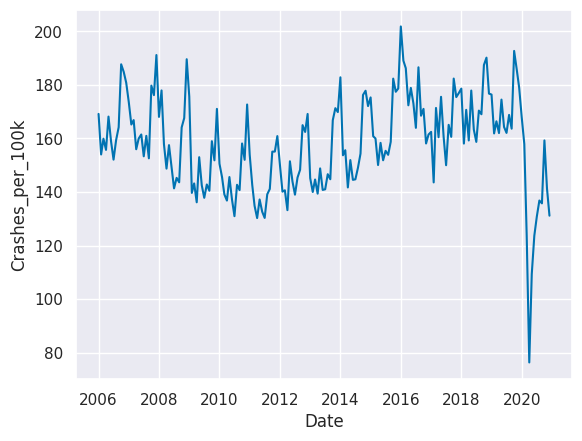

In [45]:
# creating line plot
sns.lineplot(x=traffic.Date, y=traffic.Crashes_per_100k)

Looking at the line plot of our collision data, we can see the decreasing trend in crash rates from 2006 continuing until 2010 or 2011, and then crash rates begin increasing. The data for 2020 is very different from the preceding years.
    
There also appear to be cyclical patterns, which may indicate differing crash rates by season.

### 4. Visualizing seasonal rates

Since we saw a fair amount of variance in the number of collisions occurring throughout the year, we might hypothesize that the number of collisions increases or decreases during different seasons. We can visually explore this with a box plot. 

Using `sns.boxplot()` with crash rate on the x-axis and season on the y-axis, and Removing the anomolous 2020 data by adjusting the `data` parameter to `traffic[traffic.Date.dt.year != 2020]`.

<AxesSubplot:xlabel='Crashes_per_100k', ylabel='Season'>

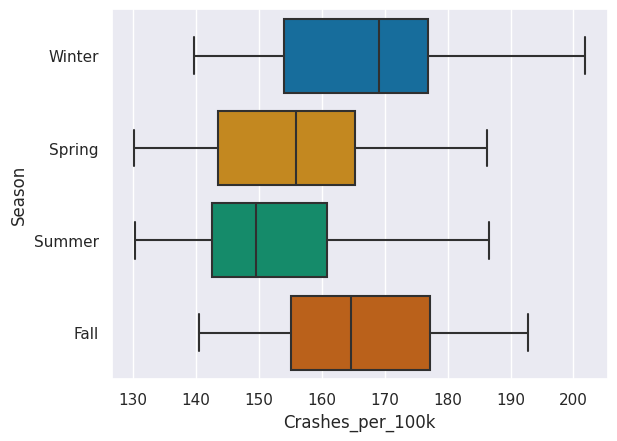

In [46]:
# creating box plot by season
sns.boxplot(x=traffic[traffic.Date.dt.year != 2020].Crashes_per_100k, y=traffic[traffic.Date.dt.year != 2020].Season)

Winter and Fall appear to have generally higher crash rates than Spring and Summer. Seasons may be the reason for the pattern in crash rates.

## Smartphone data exploration

### 5. Inspecting the smartphone use dataset

The dataset `crashes_smartphones.csv` contains smartphone data from Pew Research Center matched to normalized crash rates from the `traffic` data frame for the years 2011 to 2019.

In [47]:
# import dataset
smartphone = pd.read_csv("crashes_smartphones.csv")

# inspect first few rows
smartphone.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,4/3/12,46
1,Apr-15,150.077792,Spring,4/12/15,67
2,Apr-16,172.401948,Spring,4/4/16,72
3,Aug-12,145.403147,Summer,8/5/12,44
4,Dec-12,169.160811,Winter,12/9/12,45


### 6. Format date data type
Similar to the  `traffic` data frame, the `smartphone` data frame has a date column that is not properly formatted. We'll need to convert the `Smartphone_Survey_Date` column to the date data type using the `pd.to_datetime()` function and then inspect the data types in the data frame.

In [48]:
smartphone.dtypes

Month_Year                 object
Crashes_per_100k          float64
Season                     object
Smartphone_Survey_Date     object
Smartphone_usage            int64
dtype: object

In [49]:
smartphone.Smartphone_Survey_Date = pd.to_datetime(smartphone.Smartphone_Survey_Date)

smartphone.dtypes

Month_Year                        object
Crashes_per_100k                 float64
Season                            object
Smartphone_Survey_Date    datetime64[ns]
Smartphone_usage                   int64
dtype: object

In [50]:
smartphone.head()

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
0,Apr-12,133.213685,Spring,2012-04-03,46
1,Apr-15,150.077792,Spring,2015-04-12,67
2,Apr-16,172.401948,Spring,2016-04-04,72
3,Aug-12,145.403147,Summer,2012-08-05,44
4,Dec-12,169.160811,Winter,2012-12-09,45


In [51]:
smartphone.shape

(28, 5)

There is a lot less data available for smartphone usage rates than there was for crash rates. The `smartphone` dataframe consists of 5 columns and 28 rows.

### 7. Visualize smartphone use data

<AxesSubplot:xlabel='Smartphone_Survey_Date', ylabel='Smartphone_usage'>

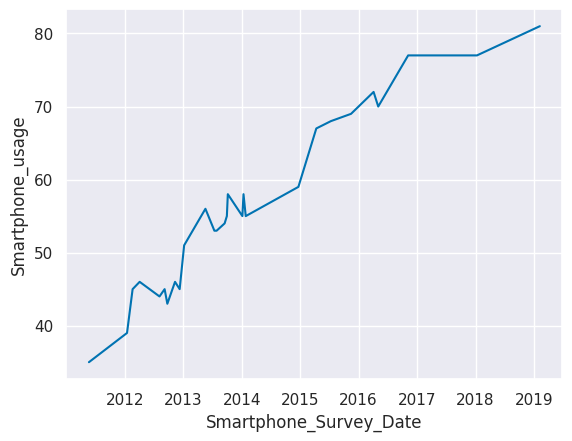

In [62]:
# creating line plot
sns.lineplot(x=smartphone.Smartphone_Survey_Date, y=smartphone.Smartphone_usage)

We can see a trend of smartphone usage increasing over time.

## Relationship exploration

### 8. Visualize crash rate by smartphone use
Creating a scatter plot with smartphone usage on one axis and crash rates on the other axis to give us an idea of whether there is a relationship between these two variables. 

<AxesSubplot:xlabel='Smartphone_usage', ylabel='Crashes_per_100k'>

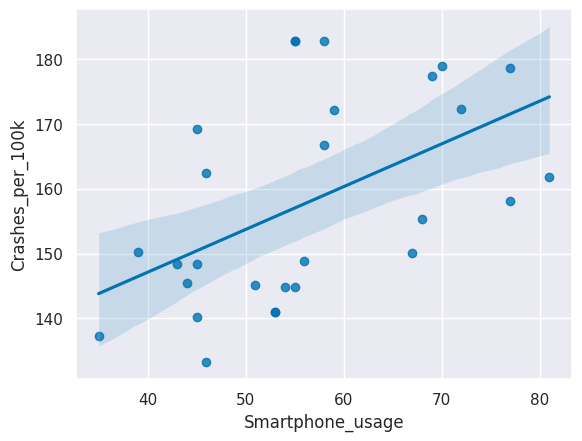

In [53]:
# creating scatter plot with regression line
sns.regplot(x=smartphone.Smartphone_usage, y=smartphone.Crashes_per_100k)

There appears to be a positive linear relationship between the rate of car crashes and the rate of adult smartphone usage in the U.S.

### 9. Checking the correlation coefficient

To test whether the correlation between `Smartphone_usage` and `Crashes_per_100k` is statistically significant, we need to calculate the Pearson's _r_ correlation coefficient and the associated _p_-value. 

In [54]:
# finding Pearson's r and p-value
corr, p = pearsonr(smartphone.Smartphone_usage, smartphone.Crashes_per_100k)

# printing corr and p
print("Pearson's r =",  round(corr,3))
print("p = ", round(p,3))

Pearson's r = 0.513
p =  0.005


The Pearson's r correlation coefficient is greater than 0.5, which indicates a moderately strong positive relationship. The p-value is less than 0.05. Together, this tells us that there is a statistically significant correlation between adult smartphone usage rates and car crash rates in the U.S. We have to be careful though: correlation does not mean causation, as the saying goes. Many other factors may be contributing to the rise in car crash rates from 2011 to 2019. 

## Analysis

### 10. Running a linear regression
We can use a linear regression to predict crash rates based on smart phone usage. Let's regress crash rates on smartphone usage. Then we can predict the crash rate in 2020 and see if it matches the actual crash rate in 2020!

In [55]:
# converting columns to arrays
X = smartphone['Smartphone_usage'].to_numpy().reshape(-1, 1)
y = smartphone['Crashes_per_100k'].to_numpy().reshape(-1, 1)

In [56]:
# instantiating the linear regression model
lm = LinearRegression()

# fitting the model
model = lm.fit(X, y)

### 11. Printing and interpreting regression coefficients

Let's see the values our model produced

In [63]:
print("Intercept: ", lm.intercept_)
print("Coefficient: ", lm.coef_)

Intercept:  [120.6637106]
Coefficient:  [[0.66103316]]


### 12. Making a prediction

Let's assume smartphone usage was the same for 2020 as it was for 2019. This is a reasonable asssumption since the increase in smartphone usage that we observed in our plot started to plateau at the end of the time series. Let's use this approximation and our regression model to predict the crash rate in 2020.

From our model output, the regression line equation is `Crashes_per_100k = 120.6637 + (0.6610 * Smartphone_usage)`. We'll run the code to view the smartphone usage rate for 2019. Then substitute this value into the equation, using Python as a calculator to predict the crash rate for 2020.

In [58]:
# get the smartphone usage rate from 2019
smartphone[smartphone['Month_Year'] == "Feb-19"]

,Month_Year,Crashes_per_100k,Season,Smartphone_Survey_Date,Smartphone_usage
7,Feb-19,161.88654,Winter,2019-02-07,81


In [59]:
# predict the crash rate in 2020 using the regression equation
y_pred = lm.intercept_ + lm.coef_ * 81
print(y_pred)

[[174.20739643]]


If the smartphone usage rate was the same in 2020 as in 2019 (81%), our model predicts that the crash rate in 2020 would be 174.205 crashes per 100,000 people.  

### 13. Comparing to the actual rate

How good was our prediction?

In [60]:
# the actual crash rate in Feb 2020
traffic[traffic.Date == "2020-02-01"]

,Date,Crashes_per_100k,Season
169,2020-02-01,157.88955,Winter


The actual crash rate in Februrary of 2020 was only 157.8895, which was a fair bit lower than our prediction. 

### 14. Visualize the prediction

Let's plot our regression plot again, but let's add two new points on top:

* The predicted 2020 crash rate
* The actual 2020 crash rate

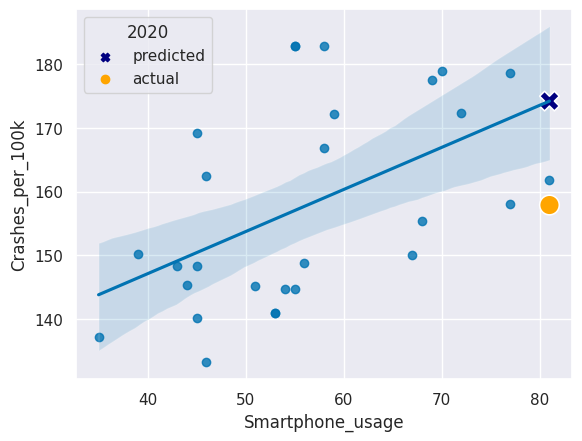

In [61]:
# the regression plot we made earlier
sns.regplot(x = 'Smartphone_usage', y = 'Crashes_per_100k', data = smartphone)

# adding a scatter plot layer to show the actual and predicted 2020 values
sns.scatterplot(x=[81, 81], y=[174.20739643, 157.88955], hue=['predicted','actual'], style=['predicted', 'actual'],
                markers = ['X','o'], palette=['navy','orange'], s=200)

# adding legend title
plt.legend(title='2020')
plt.show()

By adding another layer to our regression plot, we can see the difference between the predicted and real crash rates in February 2020. This allows us to see how these values compare to the rest of the dataset. 